# Transcribe tutorial

In [5]:
import tempfile
import mlrun

## Importing the transcribe function from hub

To import the function directly from hub, use:
```python 
transcribe_fn = mlrun.import_function("hub://transcribe")
```

In [2]:
artifact_path = tempfile.mkdtemp()

In [3]:
transcribe_fn = mlrun.import_function("function.yaml")

## Running transcribe

In [4]:
transcribe_run = transcribe_fn.run(
    handler="transcribe",
    params={
        "model_name": "tiny",
        "input_path": "./data",
        "decoding_options": {"fp16": False},
        "output_directory": "./output",
    },
    returns=[
        "transcriptions: path",
        "transcriptions_df: dataset",
        {"key": "transcriptions_errors", "artifact_type": "file", "file_format": "yaml"},
    ],
    local=True,
    artifact_path=artifact_path,
)

> 2023-07-16 17:14:01,968 [info] Storing function: {'name': 'transcribe-transcribe', 'uid': 'd1384cb679bc4c178b0195d964b628a8', 'db': None}
> 2023-07-16 17:14:01,969 [warning] Could not detect path to API server, not connected to API server!
> 2023-07-16 17:14:01,969 [warning] MLRUN_DBPATH is not set. Set this environment variable to the URL of the API server in order to connect
> 2023-07-16 17:14:01,970 [warning] Could not detect path to API server, not connected to API server!
> 2023-07-16 17:14:01,970 [warning] MLRUN_DBPATH is not set. Set this environment variable to the URL of the API server in order to connect
> 2023-07-16 17:14:01,972 [warning] Could not detect path to API server, not connected to API server!
> 2023-07-16 17:14:01,972 [warning] MLRUN_DBPATH is not set. Set this environment variable to the URL of the API server in order to connect
> 2023-07-16 17:14:09,804 [warning] Could not detect path to API server, not connected to API server!
> 2023-07-16 17:14:09,805 [warni

The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


> 2023-07-16 17:14:10,374 [info] Model loaded.


Transcribing:  67%|██████▋   | 2/3 [00:02<00:01,  1.04s/file]

> 2023-07-16 17:14:12,556 [warning] Error in file: '/Users/Yonatan_Shelach/projects/functions/transcribe/data/error_file.txt'


Transcribing: 100%|██████████| 3/3 [00:02<00:00,  1.39file/s]

> 2023-07-16 17:14:12,566 [info] Done:
      audio_file transcription_file language     length  rate_of_speech
0  speech_01.mp3      speech_01.txt       en   2.011333        3.480278
1  speech_02.mp3      speech_02.txt       en  20.793500        2.548873
> 2023-07-16 17:14:12,596 [warning] Could not detect path to API server, not connected to API server!
> 2023-07-16 17:14:12,597 [warning] MLRUN_DBPATH is not set. Set this environment variable to the URL of the API server in order to connect
> 2023-07-16 17:14:12,659 [warning] Could not detect path to API server, not connected to API server!
> 2023-07-16 17:14:12,660 [warning] MLRUN_DBPATH is not set. Set this environment variable to the URL of the API server in order to connect
> 2023-07-16 17:14:12,671 [warning] Could not detect path to API server, not connected to API server!
> 2023-07-16 17:14:12,672 [warning] MLRUN_DBPATH is not set. Set this environment variable to the URL of the API server in order to connect


> 2023-07-16 17:14:12,707 [warning] Could not detect path to API server, not connected to API server!
> 2023-07-16 17:14:12,707 [warning] MLRUN_DBPATH is not set. Set this environment variable to the URL of the API server in order to connect
> 2023-07-16 17:14:12,708 [warning] Could not detect path to API server, not connected to API server!
> 2023-07-16 17:14:12,708 [warning] MLRUN_DBPATH is not set. Set this environment variable to the URL of the API server in order to connect


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
default,...b628a8,0,Jul 16 14:14:01,completed,transcribe-transcribe,kind=owner=Yonatan_Shelachhost=M-QWXQJK77Q0,,model_name=tinyaudio_files_directory=./datadecoding_options={'fp16': False}output_directory=./output,,transcriptionstranscriptions_dftranscriptions_errors


> 2023-07-16 17:14:12,721 [info] Run execution finished: {'status': 'completed', 'name': 'transcribe-transcribe'}


In [5]:
transcribe_run.outputs

{'transcriptions': 'store://artifacts/default/transcribe-transcribe_transcriptions:d1384cb679bc4c178b0195d964b628a8',
 'transcriptions_df': 'store://artifacts/default/transcribe-transcribe_transcriptions_df:d1384cb679bc4c178b0195d964b628a8',
 'transcriptions_errors': 'store://artifacts/default/transcribe-transcribe_transcriptions_errors:d1384cb679bc4c178b0195d964b628a8'}

**Notice**: If connected to mlrun server, you can simply use:

```python
df = transcribe_run.artifact("transcriptions_df")
```

In [6]:
artifact_path += f"/{transcribe_run.metadata.name}/{transcribe_run.metadata.iteration}/"

In [10]:
df = mlrun.get_dataitem(artifact_path + "transcriptions_df.parquet").as_df()

In [11]:
df.head()

,audio_file,transcription_file,language,length,rate_of_speech
0,speech_01.mp3,speech_01.txt,en,2.011333,3.480278
1,speech_02.mp3,speech_02.txt,en,20.793500,2.548873


> 2023-08-22 21:07:37,772 [info] Project loaded successfully: {'project_name': 'transcribe'}
> 2023-08-22 21:07:38,024 [warning] artifact/output path is not defined or is local and relative, artifacts will not be visible in the UI: {'output_path': './'}
> 2023-08-22 21:07:38,025 [info] Storing function: {'name': 'transcribe-transcribe', 'uid': '2334a5fafa56422f806cd022029bc6bd', 'db': None}
> 2023-08-22 21:07:38,194 [info] Loading whisper model: 'tiny'
> 2023-08-22 21:07:38,796 [info] Model loaded.


Transcribing:   0%|          | 0/1 [00:00<?, ?file/s]

> 2023-08-22 21:11:46,162 [info] Done:
  audio_file         transcription_file language      length  rate_of_speech
0          .  Real-State-Lead-Gen-1.txt       en  146.912653        3.566745
> 2023-08-22 21:11:46,187 [warning] Skipping logging an object with the log hint '{'key': 'transcriptions_errors', 'artifact_type': 'file', 'file_format': 'yaml'}' due to the following error:
An exception was raised during the packing of '{'key': 'transcriptions_errors', 'file_format': 'yaml'}': 'yaml'


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
transcribe,...029bc6bd,0,Aug 22 21:07:38,completed,transcribe-transcribe,v3io_user=pengwkind=owner=pengwhost=jupyter-pengw-5f99fb678d-zkdv7,,model_name=tinyinput_path=./data/Real-State-Lead-Gen-1.mp3decoding_options={'fp16': False}output_directory=./outputcondition_show_plot=True,,Real-State-Lead-Gen-1_segments_dftranscriptionstranscriptions_df


> 2023-08-22 21:11:46,424 [info] Run execution finished: {'status': 'completed', 'name': 'transcribe-transcribe'}


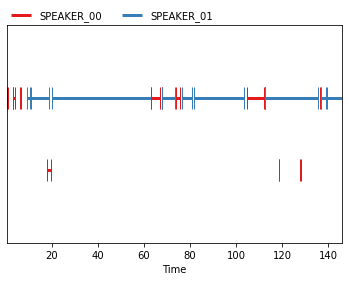

In [17]:
artifact_path = "./"
proj = mlrun.get_or_create_project("transcribe", "./")
fn = mlrun.code_to_function(
    project="transcribe",
    name="transcribe",
    filename="transcribe.py",
    kind="job",
    image="mlrun/mlrun",
    handler="transcribe",
    description="This function is used to transcribe audio file",
)
transcribe_run = fn.run(
    handler="transcribe",
    params={
        "model_name": "tiny",
        "input_path": "./data/Real-State-Lead-Gen-1.mp3",
        "decoding_options": {"fp16": False},
        "output_directory": "./output",
        "condition_show_plot": True,
    },
    returns=[
        "transcriptions: path",
        "transcriptions_df: dataset",
        {"key": "transcriptions_errors", "artifact_type": "file", "file_format": "yaml"},
    ],
    local=True,
    artifact_path=artifact_path,
)

In [18]:
transcribe_run.show()

project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
transcribe,...029bc6bd,0,Aug 22 21:07:38,completed,transcribe-transcribe,v3io_user=pengwkind=owner=pengwhost=jupyter-pengw-5f99fb678d-zkdv7,,model_name=tinyinput_path=./data/Real-State-Lead-Gen-1.mp3decoding_options={'fp16': False}output_directory=./outputcondition_show_plot=True,,Real-State-Lead-Gen-1_segments_dftranscriptionstranscriptions_df
